# **1. Data Wrangling**

**Import Libraries**

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [53]:
#Load the dataset
data=pd.read_csv('/content/Personalized_Study_Plan_Dataset.csv')

In [54]:
#check for first five rows
data.head()

,Student_ID,Physics,Chemistry,Biology,Maths,Performance_Level,Daily_Study_Hours,Total_Preparation_Days
0,1,58,76,69,58,Medium,3,62
1,2,94,68,63,72,Medium,3,70
2,3,63,81,56,99,Medium,1,33
3,4,44,88,78,42,Medium,1,50
4,5,41,57,85,57,Medium,1,69


In [55]:
#check for info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Student_ID              1000 non-null   int64 
 1   Physics                 1000 non-null   int64 
 2   Chemistry               1000 non-null   int64 
 3   Biology                 1000 non-null   int64 
 4   Maths                   1000 non-null   int64 
 5   Performance_Level       1000 non-null   object
 6   Daily_Study_Hours       1000 non-null   int64 
 7   Total_Preparation_Days  1000 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 62.6+ KB


In [56]:
#check for statistical description
data.describe()

,Student_ID,Physics,Chemistry,Biology,Maths,Daily_Study_Hours,Total_Preparation_Days
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,70.542000,69.767000,69.947000,70.501000,2.992000,60.124000
std,288.819436,17.667212,17.345881,17.897668,17.911248,1.390636,17.816117
min,1.000000,40.000000,40.000000,40.000000,40.000000,1.000000,30.000000
25%,250.750000,56.000000,55.000000,54.000000,55.000000,2.000000,44.000000
50%,500.500000,71.000000,70.000000,70.000000,70.500000,3.000000,61.000000
75%,750.250000,86.000000,84.000000,86.000000,87.250000,4.000000,75.000000
max,1000.000000,100.000000,100.000000,100.000000,100.000000,5.000000,90.000000


In [57]:
#check for missing values
data.isnull().sum()

,0
Student_ID,0
Physics,0
Chemistry,0
Biology,0
Maths,0
Performance_Level,0
Daily_Study_Hours,0
Total_Preparation_Days,0


In [58]:
#check for duplicated values
data.duplicated().sum()

0

In [59]:
data.columns

Index(['Student_ID', 'Physics', 'Chemistry', 'Biology', 'Maths',
       'Performance_Level', 'Daily_Study_Hours', 'Total_Preparation_Days'],
      dtype='object')

In [60]:
data.dtypes

,0
Student_ID,int64
Physics,int64
Chemistry,int64
Biology,int64
Maths,int64
Performance_Level,object
Daily_Study_Hours,int64
Total_Preparation_Days,int64


In [61]:
# unique values
data.apply(lambda x: len(x.unique()))

,0
Student_ID,1000
Physics,61
Chemistry,61
Biology,61
Maths,61
Performance_Level,3
Daily_Study_Hours,5
Total_Preparation_Days,61


In [62]:
# Separate numerical and categorical features
numerical_features = data.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = data.select_dtypes(include=["object"]).columns.tolist()

**IQR Method**
- The IQR method is robust to non-normal distributions. It uses the interquartile range to identify data points that fall outside 1.5 times the IQR

In [63]:
# Calculate the IQR for each numerical column
Q1 = data[numerical_features].quantile(0.25)
Q3 = data[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define outlier condition (1.5 * IQR above Q3 or below Q1)
outliers_iqr = ((data[numerical_features] < (Q1 - 1.5 * IQR)) | (data[numerical_features] > (Q3 + 1.5 * IQR)))

# Display rows with outliers
outliers = data[numerical_features][outliers_iqr.any(axis=1)]

In [64]:
outliers

,Student_ID,Physics,Chemistry,Biology,Maths,Daily_Study_Hours,Total_Preparation_Days


In [65]:
from sklearn.preprocessing import LabelEncoder
label_enco=LabelEncoder()
data['Performance_Level']=label_enco.fit_transform(data['Performance_Level'])

there is no ouliers detected

## **3.Data Analysis**

<Figure size 1200x600 with 0 Axes>

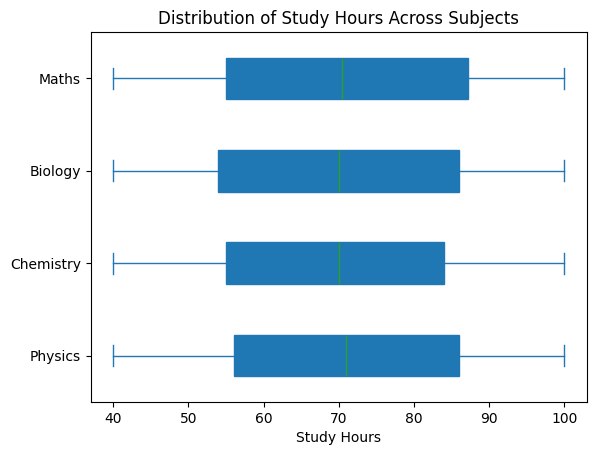

In [69]:
# Distribution of Study Hours in Each Subject
plt.figure(figsize=(12, 6))
data[['Physics', 'Chemistry', 'Biology', 'Maths']].plot(kind='box', vert=False, patch_artist=True)
plt.title("Distribution of Study Hours Across Subjects")
plt.xlabel("Study Hours")
plt.show()

**Data Distribution is Normal. Data set is Balance.**

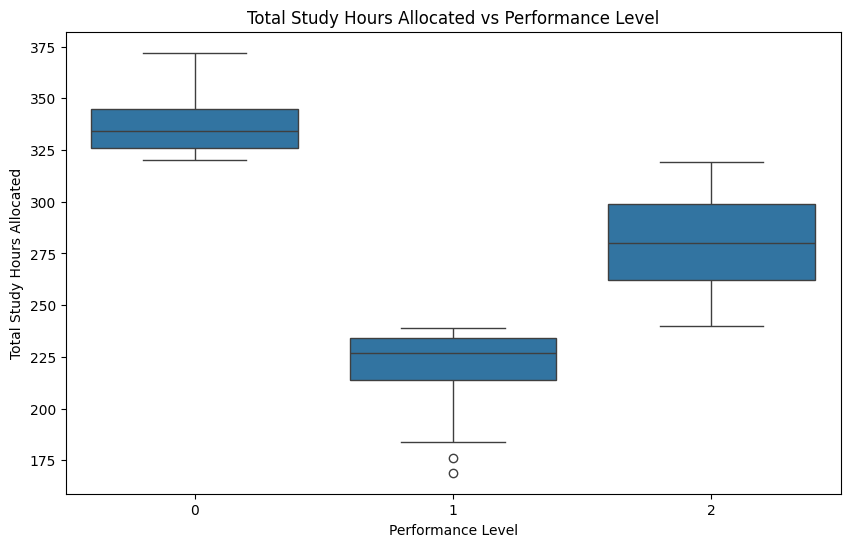

In [71]:
# Performance Level vs Total Study Hours Allocated
data['Total_Study_Hours_Allocated'] = data[['Physics', 'Chemistry', 'Biology', 'Maths']].sum(axis=1)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Performance_Level', y='Total_Study_Hours_Allocated', data=data)
plt.title("Total Study Hours Allocated vs Performance Level")
plt.xlabel("Performance Level")
plt.ylabel("Total Study Hours Allocated")
plt.show()

### Boxplot Analysis (Summary)

1. **Spread & Central Tendency:**
   - The **boxes** represent the **interquartile range (IQR)**, showing where 50% of the data lies.
   - The **median** line inside each box indicates the **central value** of the data. Skewness can be identified if the median is off-center.

2. **Whiskers & Outliers:**
   - **Whiskers** extend to the minimum and maximum values within 1.5 times the IQR.
   - **Outliers** are points beyond the whiskers, indicating extreme values.

3. **Comparison of Datasets:**
   - The width of the boxes shows **variability**; longer whiskers suggest **greater spread**.
   - **Outliers** and **median differences** highlight **variability** between datasets.

### Conclusion:
- The boxplot reveals how data is spread, its central tendency, and whether there are any **outliers**.
- Further action may include **handling outliers** or **investigating variability** across datasets.

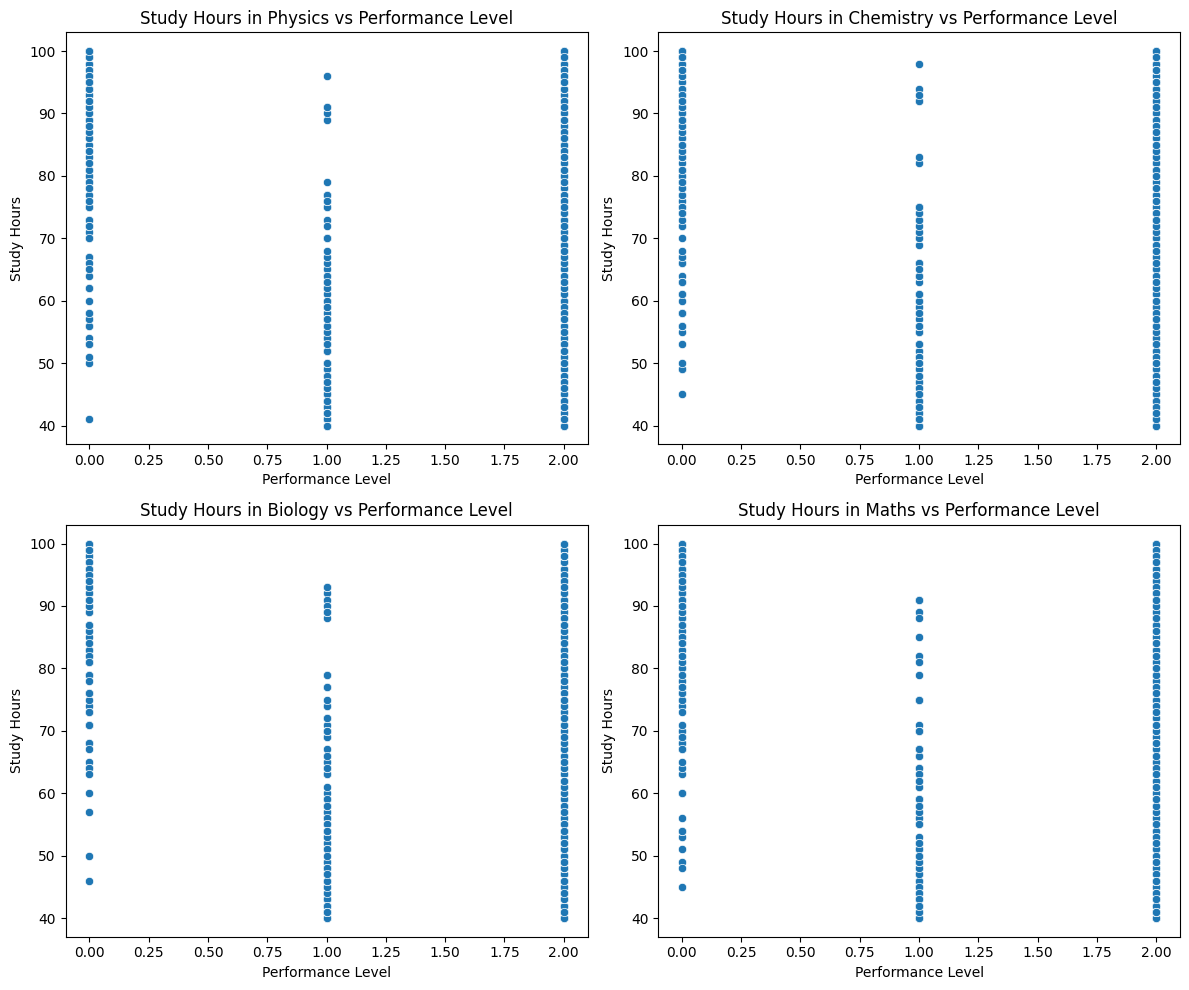

In [73]:
# Study Hours vs Performance Level for Each Subject
subjects = ['Physics', 'Chemistry', 'Biology', 'Maths']
plt.figure(figsize=(12, 10))
for i, subject in enumerate(subjects, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x='Performance_Level', y=subject, data=data)
    plt.title(f"Study Hours in {subject} vs Performance Level")
    plt.xlabel("Performance Level")
    plt.ylabel("Study Hours")
plt.tight_layout()
plt.show()

In [75]:
correlation_matrix=data.corr()

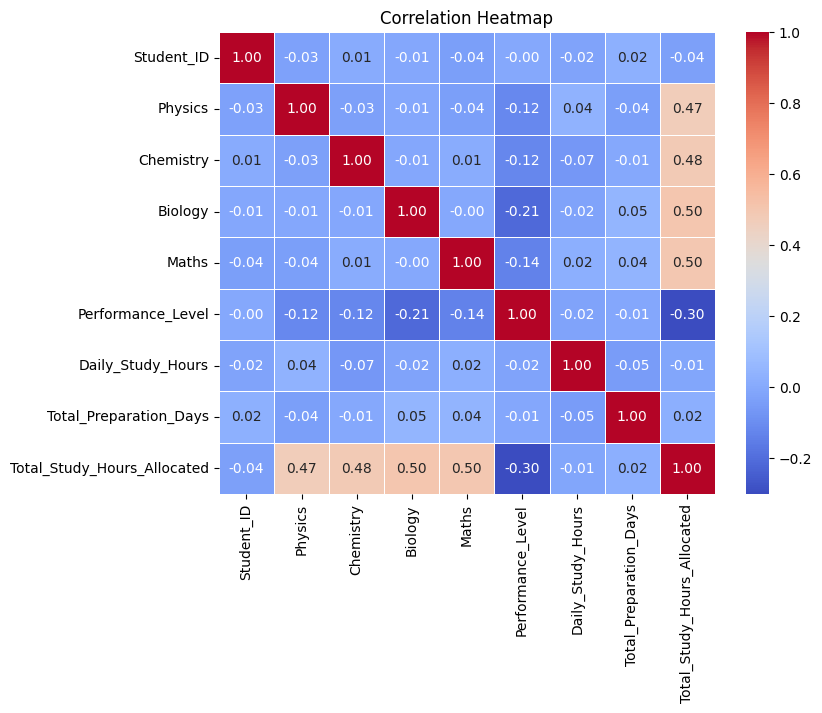

In [76]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Based on the correlation heatmap provided, I can draw the following conclusions:

1. **Student_ID** has a strong positive correlation (1.0) with itself, which is expected as it uniquely identifies each student.

2. There are moderate positive correlations between some subject areas, such as:
  - Physics and Chemistry (0.47)
  - Chemistry and Biology (0.48)
  - Maths and Biology (0.50)

  This suggests that students who perform well in one subject area tend to also perform well in related subject areas.

3. There are negative correlations between some variables, such as:
  - Performance_Level and Total_Preparation_Days (-0.30)
  - Daily_Study_Hours and Total_Preparation_Days (-0.05)
  - Performance_Level and al_Study_Hours_Allocated (-0.30)

  This indicates that factors like total preparation days and allocated study hours may have an inverse relationship with academic performance level.

4. Many of the correlation coefficients are close to 0, indicating little to no linear relationship between those variables.

Overall, the heatmap provides a high-level overview of the relationships between the different student-related variables. It can be a useful starting point for further analysis to better understand the factors influencing student performance.

# **Optimization Algorithms**

In [80]:
!pip install pulp


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 45.9 MB/s eta 0:00:00


# **Linear Programming for Personalized Study Plan**
- Linear programming (LP) is a mathematical method used for optimizing a linear objective function, subject to linear equality and inequality constraints.
- In this case, we will use LP to create an optimized study plan for students, minimizing the total study hours needed while considering available hours and priority.

In [82]:
import pandas as pd
import pulp as p
import numpy as np
# Define a function to create an optimized study plan for each student
def generate_study_plan(student_data):
    # Total available study time per subject
    total_available_time = student_data['Daily_Study_Hours'] * student_data['Total_Preparation_Days']

    # Create a LP problem for maximizing the total study time (maximize each subject's allocation)
    Lp_prob = p.LpProblem(f"Student_{student_data['Student_ID']}_Study_Plan", p.LpMaximize)

    # Create decision variables for each subject's study time (all >= 0)
    physics = p.LpVariable("Physics", lowBound=0)
    chemistry = p.LpVariable("Chemistry", lowBound=0)
    biology = p.LpVariable("Biology", lowBound=0)
    maths = p.LpVariable("Maths", lowBound=0)

    # Objective function: Maximize study time allocation across subjects
    Lp_prob += physics + chemistry + biology + maths  # Maximize total study time

    # Constraints: Max available time for each subject (e.g., total study time cannot exceed available hours)
    Lp_prob += physics <= total_available_time
    Lp_prob += chemistry <= total_available_time
    Lp_prob += biology <= total_available_time
    Lp_prob += maths <= total_available_time

    # Solve the LP problem
    status = Lp_prob.solve()

    # Return the optimized study time for each subject and the total allocated time
    return {
        'Student_ID': student_data['Student_ID'],
        'Optimized_Physics': p.value(physics),
        'Optimized_Chemistry': p.value(chemistry),
        'Optimized_Biology': p.value(biology),
        'Optimized_Maths': p.value(maths),
        'Total_Study_Hours_Allocated': sum([p.value(physics), p.value(chemistry), p.value(biology), p.value(maths)])
    }

# Generate the study plans for all students in 'data'
optimized_study_plans = []
for _, row in data.iterrows():
    optimized_study_plan = generate_study_plan(row)
    optimized_study_plans.append(optimized_study_plan)

# Create a DataFrame with the optimized study plans
optimized_study_plan_df = pd.DataFrame(optimized_study_plans)

# Display the results
print("Optimized Study Plans for Students:")
print(optimized_study_plan_df)

# save the result to a CSV file
optimized_study_plan_df.to_csv('optimized_study_plans.csv', index=False)


Optimized Study Plans for Students:
     Student_ID  Optimized_Physics  Optimized_Chemistry  Optimized_Biology  \
0             1              186.0                186.0              186.0   
1             2              210.0                210.0              210.0   
2             3               33.0                 33.0               33.0   
3             4               50.0                 50.0               50.0   
4             5               69.0                 69.0               69.0   
..          ...                ...                  ...                ...   
995         996              188.0                188.0              188.0   
996         997              105.0                105.0              105.0   
997         998              176.0                176.0              176.0   
998         999               39.0                 39.0               39.0   
999        1000               72.0                 72.0               72.0   

     Optimized_Maths  Total

In [83]:
import pulp as p

# Create an LP problem: This is a maximization problem
Lp_prob = p.LpProblem('Study_Plan_Optimization', p.LpMaximize)

# Create decision variables: study hours for Physics, Biology, Chemistry, and Math
Physics = p.LpVariable('Physics', lowBound=0)   # Minimum 0 hours for Physics
Chemistry = p.LpVariable('Chemistry', lowBound=0)   # Minimum 0 hours for Chemistry
Biology = p.LpVariable('Biology', lowBound=0)   # Minimum 0 hours for Biology
Math = p.LpVariable('Math', lowBound=0)   # Minimum 0 hours for Math

# Objective function: Maximize the study effectiveness
# Suppose each subject has a weight for its importance, based on the student's performance or target goal
Lp_prob += 2 * Physics + 3 * Chemistry + 2 * Biology + 4 * Math, "Maximize Study Effectiveness"

# Constraints:
# 1. Total available study hours should not exceed a certain limit, say 10 hours/day
Lp_prob += Physics + Chemistry + Biology + Math <= 10, "Total Available Time"

# 2. Minimum hours required per subject (based on importance or target goal)
Lp_prob += Physics >= 1, "Minimum Physics Study Hours"
Lp_prob += Chemistry >= 2, "Minimum Chemistry Study Hours"
Lp_prob += Biology >= 1, "Minimum Biology Study Hours"
Lp_prob += Math >= 2, "Minimum Math Study Hours"

# 3. Optional constraints: Maximum study hours per subject
Lp_prob += Physics <= 4, "Maximum Physics Study Hours"
Lp_prob += Chemistry <= 4, "Maximum Chemistry Study Hours"
Lp_prob += Biology <= 3, "Maximum Biology Study Hours"
Lp_prob += Math <= 4, "Maximum Math Study Hours"

# Display the problem
print(Lp_prob)

# Solve the problem
status = Lp_prob.solve()   # The solver tries to find the optimal solution

# Print the status of the solution (whether it is optimal, infeasible, etc.)
print(f"Status: {p.LpStatus[status]}")

# Print the optimal solution values for Physics, Chemistry, Biology, and Math study hours
print(f"Optimal Study Plan (in hours per subject):")
print(f"Physics: {p.value(Physics)} hours")
print(f"Chemistry: {p.value(Chemistry)} hours")
print(f"Biology: {p.value(Biology)} hours")
print(f"Math: {p.value(Math)} hours")

# Print the objective value (Total Study Effectiveness)
print(f"Total Study Effectiveness: {p.value(Lp_prob.objective)}")


Study_Plan_Optimization:
MAXIMIZE
2*Biology + 3*Chemistry + 4*Math + 2*Physics + 0
SUBJECT TO
Total_Available_Time: Biology + Chemistry + Math + Physics <= 10

Minimum_Physics_Study_Hours: Physics >= 1

Minimum_Chemistry_Study_Hours: Chemistry >= 2

Minimum_Biology_Study_Hours: Biology >= 1

Minimum_Math_Study_Hours: Math >= 2

Maximum_Physics_Study_Hours: Physics <= 4

Maximum_Chemistry_Study_Hours: Chemistry <= 4

Maximum_Biology_Study_Hours: Biology <= 3

Maximum_Math_Study_Hours: Math <= 4

VARIABLES
Biology Continuous
Chemistry Continuous
Math Continuous
Physics Continuous

Status: Optimal
Optimal Study Plan (in hours per subject):
Physics: 1.0 hours
Chemistry: 4.0 hours
Biology: 1.0 hours
Math: 4.0 hours
Total Study Effectiveness: 32.0
